In [1]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.rc("figure", dpi=100)
SMALL_SIZE = 10
BIGGER_SIZE = 12
plt.rc('font', size=BIGGER_SIZE)
plt.rc('axes', titlesize=BIGGER_SIZE)
plt.rc('axes', labelsize=BIGGER_SIZE)
plt.rc('axes', linewidth=.5)
plt.rc('xtick', labelsize=BIGGER_SIZE)
plt.rc('ytick', labelsize=BIGGER_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=1)
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.minor.size'] = 5

In [3]:
data = pd.read_csv("./runtime_auc_blocklength.csv") 

In [4]:
data

,Unnamed: 0,Dataset,Window_Size,Detector,Mean_AUC,Mean_Elapsed_Time
0,0,MSL,150,ARIMADetector,0.621903,6.859259
1,1,MSL,25,ARIMADetector,0.621903,6.859259
2,2,MSL,50,ARIMADetector,0.621903,6.859259
3,3,MSL,100,ARIMADetector,0.621903,6.859259
4,4,MSL,25,LSTMDetector,0.697925,25.717852
...,...,...,...,...,...,...
75,75,UCR,150,ARIMADetector,0.550230,2598.227752
76,76,UCR,100,ARIMADetector,0.550230,2598.227752
77,77,UCR,50,ARIMADetector,0.550230,2598.227752
78,78,UCR,25,InfluenceFunctionDetector,0.673226,4.115208


In [47]:
datasets = ["UCR", "SMAP", "MSL", "SMD"]
window_sizes = np.unique(data.Window_Size)
detectors = np.unique(data.Detector)
detector_names = {
    "ARIMADetector": "ARIMA/VAR", 
    "AnomalyTransformerDetector": "Anomaly Transformer", 
    "IForestDetector": "Isolation Forest", 
    "InfluenceFunctionDetector": "Influence Function", 
    "LSTMDetector": "LSTM", 
    "VARDetector": "ARIMA/VAR"}
metrics = ["Mean_AUC", "Mean_Elapsed_Time"]

In [48]:
data = data.replace({"Detector": detector_names})

In [49]:
base_dir = "./NYC_TAXI/"
dataframes = []
for folder in os.listdir(base_dir):
    for win_size in [50, 100, 150]:
        folder = f'win_size_{win_size}'
        for filename in os.listdir(os.path.join(base_dir, folder)):
            if filename.endswith('_results.csv'):
                detector_name = filename.split('_')[1][:-8]
                csv_file = os.path.join(base_dir, folder, filename)
                df = pd.read_csv(csv_file)
                df['Window_Size'] = win_size
                df['Detector'] = detector_name
                dataframes.append(df)

        detector_name = 'IsolationForest'
        df = pd.read_csv('./NYC_TAXI/NYC_IForestDetector_results.csv')
        df['Window_Size'] = win_size
        df['Detector'] = detector_name
        dataframes.append(df)
combined_df = pd.concat(dataframes)

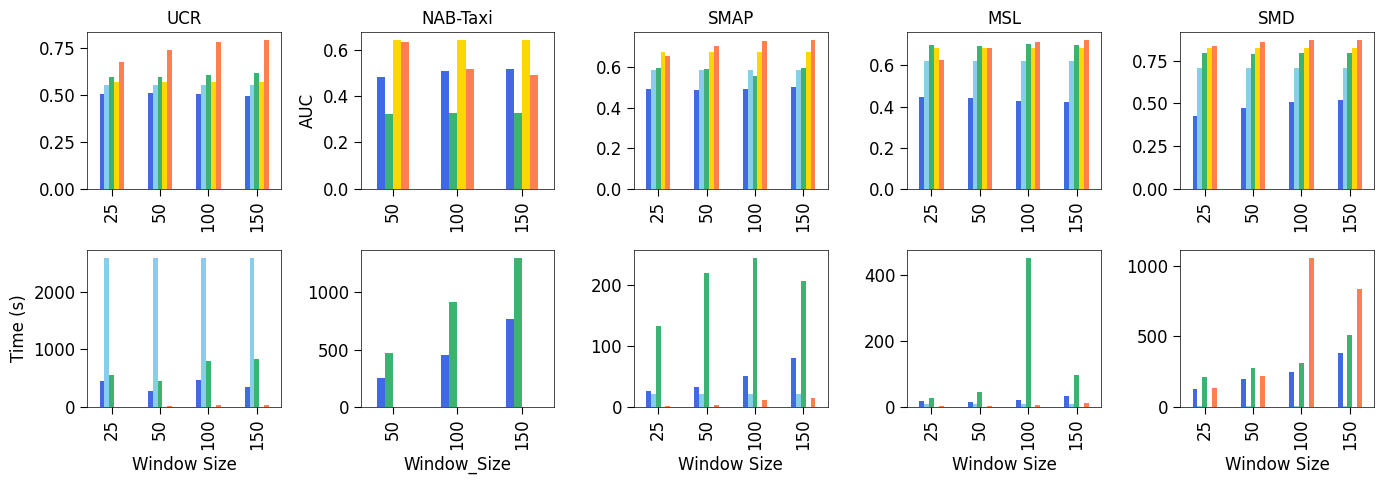

In [50]:
colors = ['royalblue', 'skyblue', 'mediumseagreen', 'gold', 'coral']

fig, axes = plt.subplots(len(metrics), len(datasets)+1, figsize=(14,5))

ctn = 0
for i, metric in enumerate(metrics):
    for j, dataset in enumerate(datasets):
        if dataset != "UCR":
            j += 1
        df = data[data.Dataset == dataset]
        grouped_df = df.groupby(['Window_Size', 'Detector'])[metric].mean().unstack()
        grouped_df = grouped_df.reindex(columns=['Anomaly Transformer', 'ARIMA/VAR', 'LSTM', 'Isolation Forest', 'Influence Function'])
        grouped_df.plot(kind='bar', ax=axes[i,j], color=colors)
        axes[i,j].legend('', frameon=False)
        # axes[0,0].legend(bbox_to_anchor=(0.,1.5), ncol=len(detectors), frameon=False)
        axes[0,j].set_title(dataset)
        axes[0,j].set_xlabel("")
        axes[0,1].set_ylabel("AUC")
        axes[1,j].set_xlabel("Window Size")
        axes[1,0].set_ylabel("Time (s)")

for i, metric in enumerate(["AUC", "Elapsed Time(s)"]):
    grouped_df = combined_df.groupby(['Window_Size', 'Detector'])[metric].mean().unstack()
    grouped_df.columns = ["Anomaly Transformer", "Influence Function", "Isolation Forest", "LSTM"]
    grouped_df = grouped_df.reindex(columns=['Anomaly Transformer', 'LSTM', 'Isolation Forest', 'Influence Function'])
    grouped_df.plot(kind='bar', ax=axes[i,1], color=['royalblue', 'mediumseagreen', 'gold', 'coral'])
    axes[i,1].legend('', frameon=False)
    axes[0,1].set_xlabel("")
    axes[1,j].set_xlabel("Window Size")    
    
axes[0,1].set_title("NAB-Taxi")

plt.tight_layout()
# plt.savefig("./plots/sensitivity_analysis.png", dpi=300)

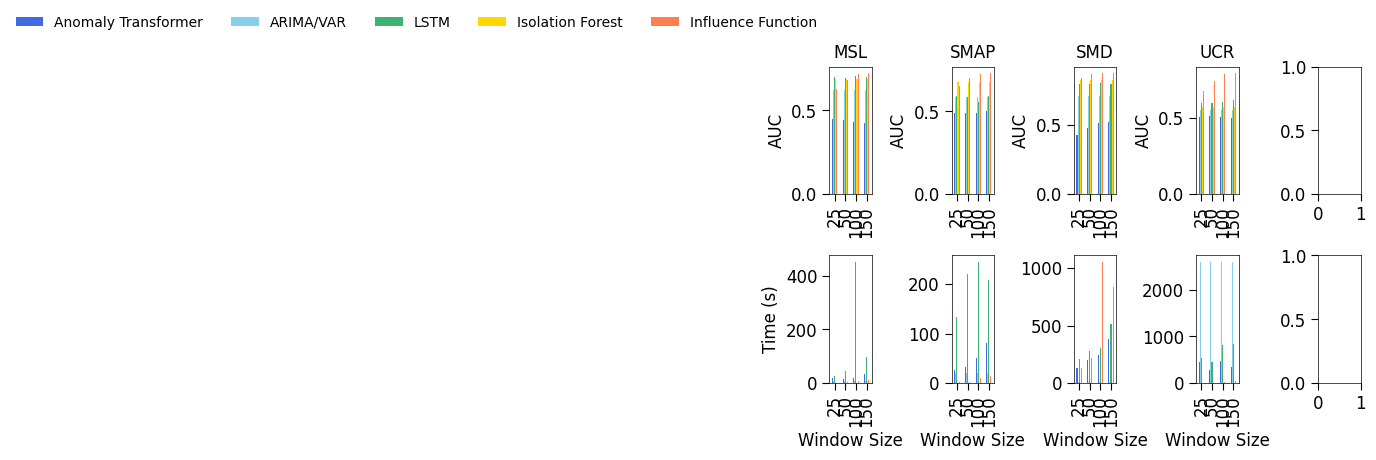

In [22]:
colors = ['royalblue', 'skyblue', 'mediumseagreen', 'gold', 'coral']

fig, axes = plt.subplots(len(metrics), len(datasets)+1, figsize=(14,5))

ctn = 0
for i, metric in enumerate(metrics):
    for j, dataset in enumerate(datasets):
        df = data[data.Dataset == dataset]
        grouped_df = df.groupby(['Window_Size', 'Detector'])[metric].mean().unstack()
        grouped_df = grouped_df.reindex(columns=['Anomaly Transformer', 'ARIMA/VAR', 'LSTM', 'Isolation Forest', 'Influence Function'])
        grouped_df.plot(kind='bar', ax=axes[i,j], color=colors)
        axes[i,j].legend('', frameon=False)
        axes[0,0].legend(bbox_to_anchor=(0.,1.5), ncol=len(detectors), frameon=False)
        axes[0,j].set_title(dataset)
        axes[0,j].set_xlabel("")
        axes[0,j].set_ylabel("AUC")
        axes[1,j].set_xlabel("Window Size")
        axes[1,0].set_ylabel("Time (s)")

plt.tight_layout()
plt.savefig("./plots/sensitivity_analysis_legend.png", dpi=200)